# Effective depth Picture

In [13]:
import pennylane as qml
from pennylane import numpy as np



nmax=4 #number of qubits
reps=30 #repetition variance estimated 
epsd=10**(-7) #finite difference epsilon 

dev = qml.device('default.mixed', wires=nmax)

p=0.0*(3/4) # 0.1*(3/4)  #depolarizing strenght
q=0.1 #amplitude strenght
depth=3*nmax #depth circuit
columsperlayer=4 
params=2*np.pi*np.random.rand(nmax,columsperlayer,depth)
#print(params)


@qml.qnode(dev)
def circuit(params):
    for L in range (depth):
        for i in range(nqubits):
            qml.RX(params[i,0,L], wires=i)
        for i in range(nqubits//2 ):
            qml.CNOT(wires=[2*i,2*i+1])
        for i in range(nqubits):
            qml.RY(params[i,1,L], wires=i)
            qml.DepolarizingChannel(p, wires=i)
            qml.AmplitudeDamping(q, wires=i)
        
        for i in range(nqubits):
            qml.RX(params[i,2,L], wires=i)
        for i in range(nqubits//2 -1 + int(nqubits%2)):
            qml.CNOT(wires=[2*i+1,2*i+2])
        for i in range(nqubits):
            qml.RY(params[i,3,L], wires=i)
            qml.DepolarizingChannel(p, wires=i)
            qml.AmplitudeDamping(q, wires=i)
    return qml.expval(qml.PauliZ(0))

drawer = qml.draw(circuit)
#print(qml.draw(circuit)(params))


nlistcost=[]
nlistcost2=[]
listvargrad=[]


nlistcost2=[]
nlistvar=[]
nqubits=nmax
for pd in range(depth):
    dev = qml.device('default.mixed', wires=nqubits)
    costs=[]
    gradpoints=[]
    for i in range(reps):
        params=2*np.pi*np.random.rand(nqubits,columsperlayer,depth)
        pardx= np.copy(params)
        pardx[0,-1,pd] = pardx[0,-1,pd] + epsd
        parsx= np.copy(params)
        parsx[0,-1,pd] = parsx[0,-1,pd] - epsd
        grad = (circuit(pardx) - circuit(parsx)) / (2*epsd)
        print(grad)
        cost=circuit(params)
        costs.append(cost)
        gradpoints.append(grad)
        #print(cost)
    
    meancost=np.mean(costs)
    nlistcost.append(meancost)
    
    meancost2=np.mean(np.abs(costs))
    nlistcost2.append(meancost2)
    
    varcost=np.var(costs)
    nlistvar.append(varcost)
    
    vargrad=np.var(gradpoints)
    listvargrad.append(vargrad)
    
    print(f"E[Mean] is {meancost:.12f} for {nqubits} ********")
    print(f"E[Cost^2] is {meancost2:.12f}")
    print(f"Var[Cost] is {vargrad:.12f}")
    


-0.0007373898713858296
0.00035622033101034845
-0.004545049336890372
-0.0007190692485892214
0.0040900097197926755
-0.00013296724832301265
-0.012814652117221215
-0.0028986266165098584
0.0024393950748269333
-0.00773459712943847
-0.0018833343218283005
-0.0024846549817603147
-0.0005050110329918311
0.0010729672705878102
0.0021320006871050623
0.001022481266321762
0.0025512686407935803
0.002637319806986227
0.0014128034853122529
-0.003685615701520817
-0.003320365649095436
-0.000937601662975851
-0.004247124318901285
0.0001441852193195814
-0.0026905214167705083
-0.002975371615754341
0.005106210454464133
-0.0025422436378264024
0.004951352383653074
-0.004427295197118042
E[Mean] is 0.115567368915 for 4 ********
E[Cost^2] is 0.117642064517
Var[Cost] is 0.000013755331
-0.0028838370580430706
-0.0018764576004137723
-0.0032735292254670867
-0.0014818293814222727
0.00159330937332669
0.0006932696083872258
-0.006011276476591831
-0.004063708258783549
-0.002847579394504862
-0.0026350793769225334
-0.00078023365

-0.038688653392071615
-0.07165463528080451
-0.04563654759648372
-0.026052225376993476
-0.06699944987698103
0.04708246598150723
0.0926417087487863
-0.03450656455017409
-0.0015208068138150566
0.1536959448600328
-0.0137728500826384
-0.008796860462290113
-0.04139229292654534
0.03810773196999406
-0.05428393456963221
0.10201236549933768
0.04984547191666522
-0.05219188109473194
-0.0017562390430825303
0.13524546232934753
0.028551797315312655
0.07958003617192233
0.031027549696194257
-0.030068205703059903
0.15351331067448015
0.06530699953044561
0.10711003112229278
-0.03303876811022732
0.022717222269985626
0.08662878664411622
E[Mean] is 0.090993643992 for 4 ********
E[Cost^2] is 0.094361862129
Var[Cost] is 0.004404389111


/var/folders/43/l1qxrlk138533w4m74y89n8h0000gn/T/ipykernel_29129/636685680.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


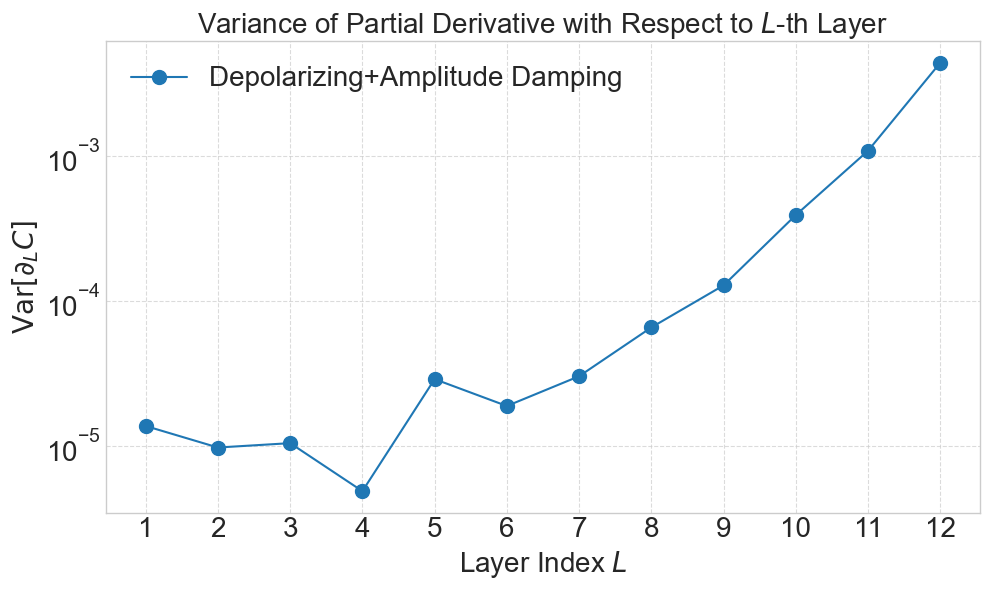

In [14]:
import matplotlib.pyplot as plt

x = [x+1 for x in range(depth)]
y1 = listvargrad  # New data
#y2 = listvargradq0  # Another set of data

# Set the 'seaborn-whitegrid' style
plt.style.use('seaborn-whitegrid')

# Create a plot
plt.figure(figsize=(10, 6))

# Create line plots for both datasets
#plt.plot(x, y1, marker='o', linestyle='-',  markersize=10, color='tab:blue', label='Depolarizing+Amplitude Damping')

plt.semilogy(x, y1, marker='o', linestyle='-',  markersize=10, color='tab:blue', label='Depolarizing+Amplitude Damping')

#plt.semilogy(x, y1, marker='o', linestyle='-',  markersize=10, color='tab:blue', label='Depolarizing+Amplitude Damping')

#plt.semilogy(x, y1, marker='o', linestyle='-',  markersize=10, color='tab:blue', label='Depolarizing+Amplitude Damping')
#plt.semilogy(x, y2, marker='s', linestyle='--',  markersize=10, color='tab:orange', label='Only Depolarizing')

# Add labels and title with LaTeX, adjust font sizes
plt.xlabel('Layer Index $L$', fontsize=20)
plt.ylabel('$\mathrm{Var}[\partial_L C]$', fontsize=20)
plt.title('Variance of Partial Derivative with Respect to $L$-th Layer', fontsize=20)

# Add a legend, adjust font size
plt.legend(fontsize=20)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Increase tick font size
plt.xticks(x,fontsize=20)
plt.yticks(fontsize=20)

# Save the plot
plt.tight_layout()
plt.savefig(f'AMPDEP_LAYERq={q}p={p}n={nqubits}.png', dpi=300, bbox_inches='tight')
np.savez(f'AMPDEP_LAYERq={q}p={p}n={nqubits}.npz', listvargrad=listvargrad)